a) Given a set of ambulances, count how many is covered by r.

b) Given a percentage of coverage, determine the minimum radius that achieves this coverage.

In [1]:
import read_data
import numpy as np
from matplotlib import pyplot as plt

(calls, allbases, demands, times, calls_latlong) = read_data.populate_data()
allbases = np.delete(np.array(allbases), 2, 1)
demands = np.delete(np.array(demands), 2, 1)
times = np.array(times)
calls_latlong = np.array(calls_latlong)

ind = np.random.randint(0, allbases.shape[0], 8)
bases = allbases[ind,:]
points = np.delete(allbases, ind, 0)

distance = times[ind,:]

In [2]:
def radius_to_coverage (r1=600, graph=True):
    r1_coverage = np.any(distance < r1, 0)
    r1_covered = np.nonzero(r1_coverage)
    r1_exposed = np.nonzero(np.logical_not(r1_coverage))

    c = np.shape(r1_covered)[1]
    e = np.shape(r1_exposed)[1]
    ratio = (c / (c + e))
    

    if graph:
        plt.figure()
        plt.scatter(demands[r1_covered,0],demands[r1_covered,1], c='b')
        plt.scatter(demands[r1_exposed,0],demands[r1_exposed,1], c='r')
        plt.scatter(bases[:,0],bases[:,1], c='y')
        plt.show()
    
    return 100 * ratio

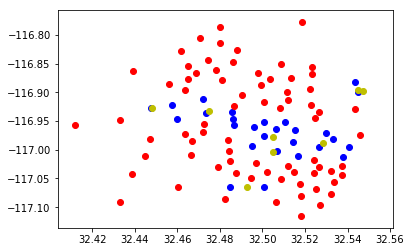

27.0

In [3]:
radius_to_coverage(r1=500)

In [4]:
def coverage_to_radius(target_coverage, step=True):
    r = 1700
    actual_coverage = 99999999
    
    
    # Binary search downwards from r=2000 towards optimal r.
    if step: print("Going down. Actual should go below target. ")
    while (actual_coverage - target_coverage >= 0):
        actual_coverage = radius_to_coverage(r, graph=False)
        if step:
            print ("target coverage: ", target_coverage)
            print ("actual coverage: " , actual_coverage, "\nr: ", r, "\n")
        if actual_coverage - target_coverage == 0: return r
        r /= 2
        
    
    
    # Binary search towards target_coverage
    if step: print("Going back up.")
    while (target_coverage - actual_coverage >= 0):
        actual_coverage = radius_to_coverage(r, graph=False)
        if step:
            print ("target coverage: ", target_coverage)
            print ("actual coverage: " , actual_coverage, "\nr: ", r, "\n")
        if actual_coverage - target_coverage == 0: return r
        r += 200
        
    
    if step: print ("Going back down.")
    while (actual_coverage - target_coverage >= 0):
        if step:
            print ("Difference: %f"%(actual_coverage - target_coverage))
            print ("target coverage: ", target_coverage)
            print ("actual coverage: " , actual_coverage, "\nr: ", r, "\n")
        actual_coverage = radius_to_coverage(r, graph=False)
        if actual_coverage - target_coverage == 0: return r
        r -= 5
    
    
    return r

In [5]:
coverage_to_radius(100)

Going down. Actual should go below target. 
target coverage:  100
actual coverage:  99.0 
r:  1700 

Going back up.
target coverage:  100
actual coverage:  78.0 
r:  850.0 

target coverage:  100
actual coverage:  90.0 
r:  1050.0 

target coverage:  100
actual coverage:  96.0 
r:  1250.0 

target coverage:  100
actual coverage:  99.0 
r:  1450.0 

target coverage:  100
actual coverage:  99.0 
r:  1650.0 

target coverage:  100
actual coverage:  99.0 
r:  1850.0 

target coverage:  100
actual coverage:  100.0 
r:  2050.0 



2050.0

In [6]:
all_radiuses = []
for coverage in range (1, 101):
    print ("Doing: " , coverage)
    r = coverage_to_radius(coverage, step=False)
    all_radiuses.append([coverage, r])
    print ("Finished.")
    

Doing:  1
Finished.
Doing:  2
Finished.
Doing:  3
Finished.
Doing:  4
Finished.
Doing:  5
Finished.
Doing:  6
Finished.
Doing:  7
Finished.
Doing:  8
Finished.
Doing:  9
Finished.
Doing:  10
Finished.
Doing:  11
Finished.
Doing:  12
Finished.
Doing:  13
Finished.
Doing:  14
Finished.
Doing:  15
Finished.
Doing:  16
Finished.
Doing:  17
Finished.
Doing:  18
Finished.
Doing:  19
Finished.
Doing:  20
Finished.
Doing:  21
Finished.
Doing:  22
Finished.
Doing:  23
Finished.
Doing:  24
Finished.
Doing:  25
Finished.
Doing:  26
Finished.
Doing:  27
Finished.
Doing:  28
Finished.
Doing:  29
Finished.
Doing:  30
Finished.
Doing:  31
Finished.
Doing:  32
Finished.
Doing:  33
Finished.
Doing:  34
Finished.
Doing:  35
Finished.
Doing:  36
Finished.
Doing:  37
Finished.
Doing:  38
Finished.
Doing:  39
Finished.
Doing:  40
Finished.
Doing:  41
Finished.
Doing:  42
Finished.
Doing:  43
Finished.
Doing:  44
Finished.
Doing:  45
Finished.
Doing:  46
Finished.
Doing:  47
Finished.
Doing:  48
Finished.
D

In [7]:
for p in all_radiuses:
    print (p)

[1, 53.125]
[2, 86.5625]
[3, 86.5625]
[4, 101.5625]
[5, 106.25]
[6, 193.125]
[7, 188.125]
[8, 212.5]
[9, 256.25]
[10, 276.25]
[11, 306.25]
[12, 341.25]
[13, 336.25]
[14, 336.25]
[15, 351.25]
[16, 386.25]
[17, 381.25]
[18, 396.25]
[19, 425.0]
[20, 437.5]
[21, 432.5]
[22, 442.5]
[23, 452.5]
[24, 472.5]
[25, 467.5]
[26, 487.5]
[27, 497.5]
[28, 492.5]
[29, 502.5]
[30, 502.5]
[31, 517.5]
[32, 512.5]
[33, 522.5]
[34, 567.5]
[35, 562.5]
[36, 577.5]
[37, 582.5]
[38, 587.5]
[39, 602.5]
[40, 612.5]
[41, 622.5]
[42, 617.5]
[43, 632.5]
[44, 627.5]
[45, 627.5]
[46, 642.5]
[47, 647.5]
[48, 642.5]
[49, 642.5]
[50, 652.5]
[51, 662.5]
[52, 657.5]
[53, 667.5]
[54, 682.5]
[55, 677.5]
[56, 677.5]
[57, 687.5]
[58, 692.5]
[59, 712.5]
[60, 707.5]
[61, 707.5]
[62, 717.5]
[63, 742.5]
[64, 762.5]
[65, 757.5]
[66, 782.5]
[67, 787.5]
[68, 792.5]
[69, 797.5]
[70, 802.5]
[71, 807.5]
[72, 802.5]
[73, 812.5]
[74, 812.5]
[75, 822.5]
[76, 827.5]
[77, 837.5]
[78, 850.0]
[79, 885.0]
[80, 895.0]
[81, 890.0]
[82, 920.0]
[8

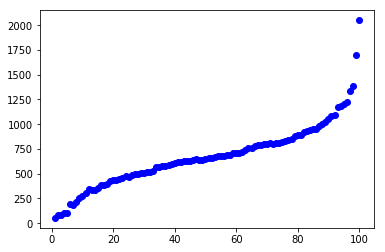

In [8]:
radius_array = np.array(all_radiuses)


plt.figure()
plt.scatter(radius_array[:,0],radius_array[:,1], c='b')
plt.show()